In [1]:
import numpy as np

import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras as keras

import seaborn as sns
import tensorflow.keras.backend as K

In [2]:
!cd  'D:\Irmak Dosyalar\HW\TEZ\Implementation\form'

The filename, directory name, or volume label syntax is incorrect.


In [3]:

#One hot encoding for the form result
def evaluate_csv(csv_toevaluate,csv_answers,main_genre=None):
    m = tf.keras.metrics.BinaryAccuracy()
    m2 = tf.keras.metrics.Recall()
    m3 = tf.keras.metrics.Precision()
    df = pd.read_csv(csv_toevaluate)
    df_answers = pd.read_csv(csv_answers)
    df_out = pd.DataFrame()
    answer_list = df_answers["Genres"].values.tolist()
    one_hot_encoded_answers = [[int(k in a.replace(']','').replace('[','').replace('\'','').split(',')) for k in main_genre] for a in answer_list]
    print(one_hot_encoded_answers)
    for row in range(1, df.shape[0]):
        row_info = df.iloc[row].tolist()
        for col in range(4,df.shape[1]):

            list = str(row_info[col-3]).split(';')
            one_hot_encoded = [int(k in list) for k in main_genre]
            df_out.loc[row,col] = str(one_hot_encoded)
            m.update_state([one_hot_encoded_answers[col-4]], [one_hot_encoded])
            m2.update_state([one_hot_encoded_answers[col-4]], [one_hot_encoded])
            m3.update_state([one_hot_encoded_answers[col-4]], [one_hot_encoded])
            print("predicted : ", one_hot_encoded)
            print("real : ", one_hot_encoded_answers[col-4])
            print("binary accuracy : ", m.result().numpy())
            print("recall : ", m2.result().numpy())
            print("precision : ", m3.result().numpy())

    #df_out.to_csv("form_one_hot_encoded.csv")
main_genre = ["Horror","Thriller","Action","Comedy","Adventure","Sci-fi","Children","Crime","Romance","Drama","Mystery"]
#evaluate_csv("form_out.csv","answers.csv", main_genre)

In [4]:
# YOU CAN TRY THESE 4 STEPS:
# working with numpy
np.set_printoptions(edgeitems=25, linewidth=100000)

# working with pandas
pd.options.display.max_rows = 10000000

# In VSCODE SETTINGS (UI) type "Jupyter: Max Output Size" and set to 0 or high value
# In VSCODE SETTINGS (UI) type "Jupyter: Text Output Limit" and set to 0 or high value

In [5]:
def distance_matrix_one_hot_encoder(input):
    # fill output with zeros
    output = np.zeros ( shape = len (input), dtype=int)
    sorted_indices = [i[0] for i in sorted(enumerate(input), key=lambda k: k[1], reverse=True)]

    output[sorted_indices[0]] = 1 # maximum should be always 1. 
    sorted_input = sorted(input, reverse=True)

    distances = [(sorted_input[s] - sorted_input[s+1]) for s in range(0,len(sorted_input)-1)] #this has length of input - 1
    crop_ = np.argmax(distances)
    for i in range(1,len(input)):
        if i <= crop_:
            output[sorted_indices[i]] = 1 
            
    return output
distance_matrix_one_hot_encoder([0.9, 0.11, 0.85, 0.33, 0.8])

array([1, 0, 1, 0, 1])

[0 0 1 0 1 0 1 0 0] ;
[0 0 0 1 0 0 0 1 0] ;
[0 0 0 1 0 0 0 1 0] ;
[0 0 1 0 0 0 0 1 0] ;
[0 1 0 0 0 0 0 0 1] ;
[0 0 0 1 0 0 0 1 0] ;
[0 0 0 0 0 0 0 1 0] ;
[0 1 0 0 0 1 0 0 0] ;
[1 0 1 0 0 0 0 0 0] ;
[0 0 0 1 0 0 0 0 0] ;
[0 0 0 1 0 0 0 0 0] ;
[0 0 0 0 0 0 1 1 0] ;
[0 0 1 0 0 1 0 0 0] ;
[0 0 0 1 0 0 0 0 0] ;
[0 0 0 0 0 0 0 1 0] ;
[0 0 0 0 0 0 0 1 0] ;
[0 1 0 0 0 1 0 0 0] ;
[0 1 0 0 0 1 0 0 0] ;
[0 0 1 0 0 0 0 1 0] ;
[1 0 0 0 0 1 0 0 0] ;
[1 0 1 0 0 0 0 0 0] ;
[0 0 0 1 0 0 0 0 0] ;
[0 0 0 1 0 0 0 0 0] ;
[0 0 0 1 0 0 0 0 0] ;
[0 0 0 1 1 0 0 0 0] ;
[0 0 1 0 0 0 0 0 0] ;
[0 0 0 1 0 0 0 0 0] ;
[0 0 0 1 0 0 0 0 0] ;
[0 0 1 0 0 0 0 1 0] ;
[0 1 0 0 0 0 0 1 0] ;
[0 1 0 0 0 1 0 0 0] ;
[0 0 0 0 0 0 0 1 0] ;
[0 0 0 1 0 0 0 1 0] ;
[1 0 1 0 0 0 0 0 0] ;
[0 0 0 0 0 0 0 1 0] ;
[0 0 0 0 0 0 0 1 0] ;
[0 0 0 0 0 0 0 1 0] ;
[1 0 0 0 0 0 0 1 1] ;
[1 1 0 0 0 0 0 0 1] ;
[0 1 1 0 0 0 0 1 0] ;
[0 1 0 0 0 0 0 0 0] ;
[1 0 0 0 0 0 0 0 1] ;
[0 0 0 1 0 0 0 0 1] ;
[0 0 0 0 0 0 0 1 0] ;
[0 1 1 0 1 0 0 0 0] ;
[0 0 0 1 0

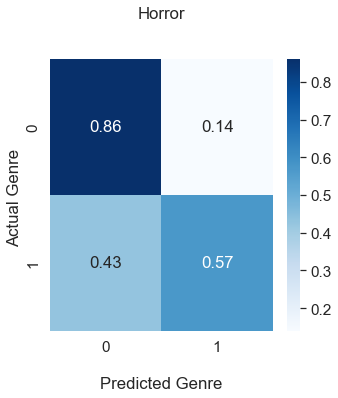

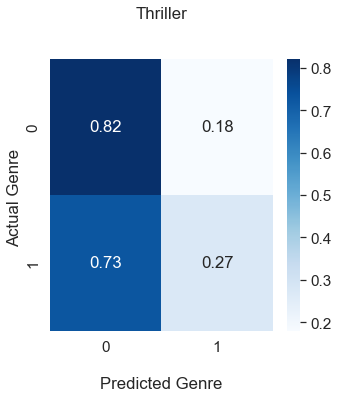

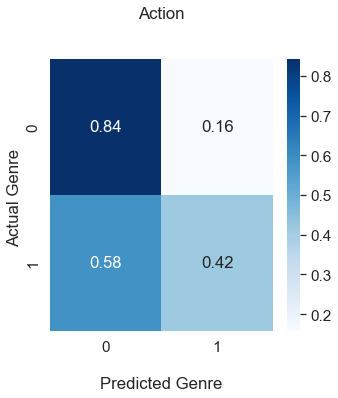

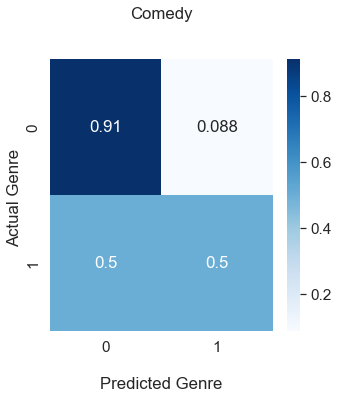

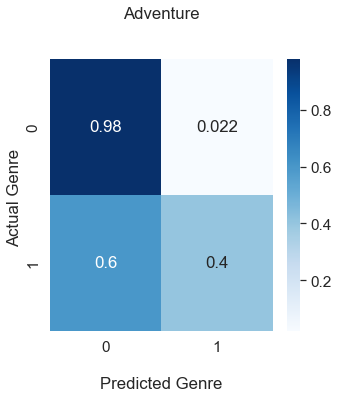

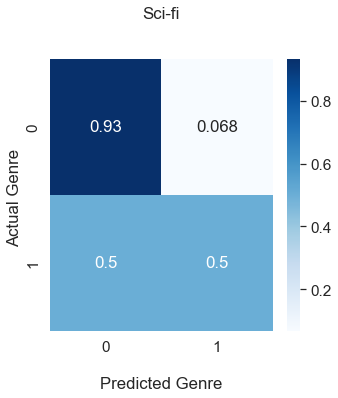

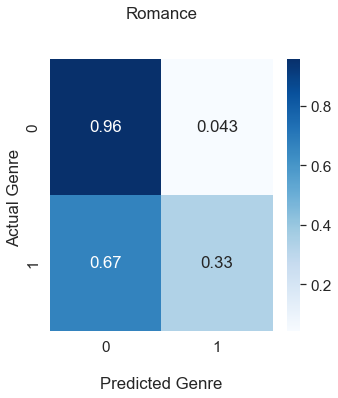

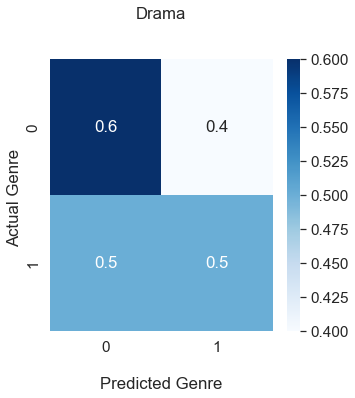

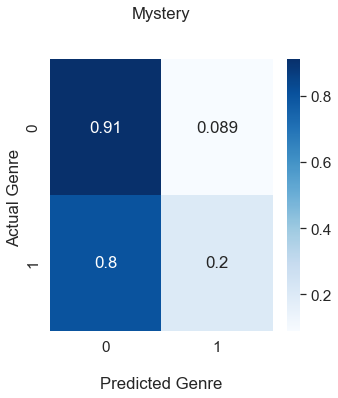

In [10]:
import category_encoders as ce
from scipy.spatial import distance_matrix
import statistics
 
import sklearn

#One hot encoding for the form result
def evaluate_csv_based_on_avg(csv_toevaluate,csv_answers,main_genre=None):
    m = tf.keras.metrics.BinaryAccuracy()
    m2 = tf.keras.metrics.Recall()
    m3 = tf.keras.metrics.Precision()
    df = pd.read_csv(csv_toevaluate)
    df_answers = pd.read_csv(csv_answers)
    sum_results = np.zeros(shape = (50,len(main_genre)))
    answer_list = df_answers["Genres"].values.tolist()
    
    one_hot_encoded_answers = np.array([[int(k in a.replace(']','').replace('[','').replace('\'','').split(',')) for k in main_genre] for a in answer_list])

    for row in range(1, df.shape[0]):
        row_info = df.iloc[row].tolist()
        for col in range(4,df.shape[1]):
            list = str(row_info[col]).split(';')
            
            one_hot_encoded = [int(k in list) for k in main_genre]
            sum_results[col-4] = sum_results[col-4]+one_hot_encoded
            
    predictions = [row/sum(row) for row in np.array(sum_results)]
    predictions= np.vstack(predictions)
    [print(i,";") for i in one_hot_encoded_answers]
    distance_one_hot_encoded_predictions = [distance_matrix_one_hot_encoder(p) for p in predictions] 
    #for i,pred in enumerate(distance_one_hot_encoded_predictions):
#
    #    print("\t".join([x[0:6] for x in main_genre]))
    #    print("\t".join([f"{x:0.3f}" for x in predictions[i]]))
    #    print("\t".join([f"{x:0.3f}" for x in distance_one_hot_encoded_predictions[i]]))
    #    print("\t".join([f"{x:0.3f}" for x in one_hot_encoded_answers[i]]))
    #    print("***")
    #    pass
    m.update_state([one_hot_encoded_answers], [predictions])
    m2.update_state([one_hot_encoded_answers], [predictions])
    m3.update_state([one_hot_encoded_answers], [predictions])

    predictions = np.array(distance_one_hot_encoded_predictions, dtype = int)
    print("Accuracy: ",m.result().numpy())
    conf_mat_dict={}
    for label_col in range(len(main_genre)):
        y_true_label = np.array(one_hot_encoded_answers)[:, label_col]
        y_pred_label = np.array(distance_one_hot_encoded_predictions )[:, label_col]

        conf_mat_dict[main_genre[label_col]] = confusion_matrix(y_pred=y_pred_label, y_true=y_true_label)


        cf_matrix =conf_mat_dict[main_genre[label_col]]
        np.set_printoptions(precision=2)


        conf_norm = cf_matrix.astype('float')/cf_matrix.sum(axis=1)[:,np.newaxis]
        fig, ax = plt.subplots(figsize=(5,5))  

        ax = sns.heatmap(conf_norm, annot=True, cmap='Blues',ax = ax)
        ax.set_title(str(main_genre[label_col])+'\n\n')
        ax.set_xlabel('\nPredicted Genre')
        ax.set_ylabel('Actual Genre ')
        sns.set(font_scale=1.4)
        ax.figure.savefig("Confusion_matrices/" + str(main_genre[label_col]))

    ## Display the visualization of the Confusion Matrix.
    cf_matrix = multilabel_confusion_matrix(y_pred=predictions, y_true=one_hot_encoded_answers)
    print(cf_matrix)
    import sklearn.metrics as skm
    print( skm.classification_report(y_pred=predictions, y_true=one_hot_encoded_answers,target_names = main_genre))
    #df_out.to_csv("form_one_hot_encoded.csv")
main_genre = ["Horror","Thriller","Action","Comedy","Adventure","Sci-fi","Romance","Drama","Mystery"]
evaluate_csv_based_on_avg("form_out.csv","answers.csv", main_genre)